# Week 04

# Task 1

In this task you will implement and train a multi layer perceptron (MLP) model using Gradient Descent and back propagation algorithms. The model should have 4 neurons with ReLu activation function in the hidden layer (Layer 1) and a single neuron with Sigmoid activation fuction in the output layer (Layer 2). The MLP will be applied to solve the binary classification problem from the previous practicals. 

**1. Loading the data.** 

The first two columns are the feature variables and the last column in the target output.

In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn import datasets 
import matplotlib.pyplot as plt

x, y = datasets.make_moons(500, noise=0.1)
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.winter)

***
**2. Implementing batch Greadient Descent with backpropagation.**

- Split the dataset into test and train set, with the split 0.2 for the test set.
- Implement the activation functions and their derivatives.
- Implement loss function and its derivative. 
- Initialize weights with uniform distribution (-1,1) and biases with zero values.
- Train the Neural Network with Batch GD algorithm and the train set. Use 0.05 as learning rate.
- Train the model for 1000 epochs.
- Visualise train and test error and accuracy across the epochs.
- Report the final test accuracy of the model.


In [2]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

In [3]:
def sigmoid_derivative(v):
    return sigmoid(v)*(1-sigmoid(v))

In [4]:
def ReLu(v):
    return np.maximum(0,v)

In [5]:
def ReLu_derivative(v):
    return np.where(v<=0,0,1)

In [6]:
def crossEntrop(o,y):
    return (-y*(np.log(o)) - (1-y)* np.log(1-o))

In [7]:
def crossEntrDeriv(o,y):
    return -(y/o - (1-y)/(1-o))

In [8]:
y=y.reshape(len(y),1)

Final Accuracy:  0.86


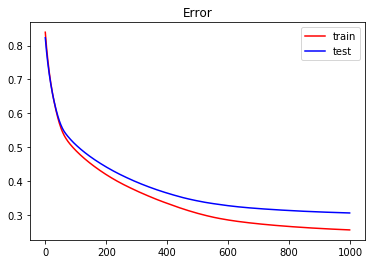

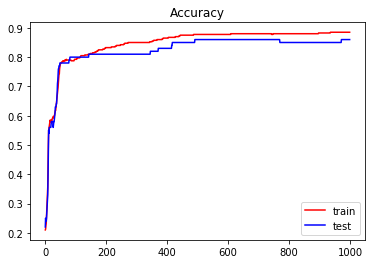

In [94]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0,)
 #initializing weights
np.random.seed(42)
w = np.random.uniform(-1,1,[x_train.shape[1],4])
w2 = np.random.uniform(-1,1,[4,1])
b = np.array([[0.,0.,0.,0.]])
b2=np.array([[0.]])
l = 0.05


train_E = []
test_E = []
train_Acc = []
test_Acc = []

for epoch in range(1000):
    #feed forward
    in_ = x_train@w + b
    out1 = ReLu(in_)
    in2 = out1@w2+b2
    out2 = sigmoid(in2)
    
    error = crossEntrop(out2 ,y_train).mean()
    
    #Evaluation
    #Error
    train_E.append(error)
    test_E.append(crossEntrop(sigmoid(ReLu(x_test@w+b)@w2+b2),y_test).mean())
    #Accuracy
    pred_train = np.where(out2 > 0.5, 1,0)
    pred_test = np.where(sigmoid(ReLu(x_test@w+b)@w2+b2) > 0.5,1,0)
    train_Acc.append(metrics.accuracy_score(y_train,pred_train))
    test_Acc.append(metrics.accuracy_score(y_test,pred_test))
    
    #backpropagation
    dEdOut2 = crossEntrDeriv(out2, y_train)
    dOut2dIn2 = sigmoid_derivative(in2)
    dEdIn2 = dEdOut2*dOut2dIn2
    dIn2dW2 = out1
    dEdW2 = (1/x_train.shape[0])*dIn2dW2.T@(dEdIn2)
    dEdB2 = (1/x_train.shape[0])*np.ones([1,len(x_train)])@dEdIn2
    w2 -= l*dEdW2
    b2 -= l*dEdB2
    
    dEdOut1 = dEdIn2 * w2.T
    dOut1dIn1 = ReLu_derivative(in_)
    dEdIn1 = dEdOut1*dOut1dIn1
    dIn1dW = x_train
    dEdW = (1/x_train.shape[0])*dIn1dW.T@((dEdIn2@w2.T)*dOut1dIn1)
    dEdB = (1/x_train.shape[0])*np.ones([1,len(x_train)])@((dEdIn2@w2.T)*dOut1dIn1)
    w -= l*dEdW
    b -= l*dEdB
    
    
print('Final Accuracy: ', metrics.accuracy_score(y_test,np.where(sigmoid(ReLu(x_test@w+b)@w2+b2) > 0.5,1,0)))    
    
z=np.arange(1000)
f1=plt.figure(1)
plt.plot(z,train_E,label="train",color='red')
plt.plot(z,test_E,label="test",color='blue')
plt.legend(loc='best')
plt.title('Error')
f1.show()

f2=plt.figure(2)
plt.plot(z,train_Acc,label="train",color='red')
plt.plot(z,test_Acc,label="test",color='blue')
plt.legend(loc='best')
plt.title('Accuracy')
f2.show()

# Task 2

In this taks you should implement a MLP model and train it with the 'Breast Cancer' dataset from [sklearn](https://scikit-learn.org/stable/datasets/index.html) library. Evaluate your model using 10 cross validation. Report the average accuracy of the model accross all folds. You can experiment with different architectures of the Neural Network.

In [97]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold

x,y = load_breast_cancer(return_X_y = True)

x = preprocessing.MinMaxScaler().fit_transform(x)
y=y.reshape(len(y),1)
kf = KFold(n_splits=10, shuffle=True)
np.random.seed(42)
test_Acc = []#for storing test error from each fold
l = 0.05

for train_index, test_index in kf.split(x):
    #initialising parameters
    w = np.random.uniform(-1,1,[x[train_index].shape[1],5])
    w2 = np.random.uniform(-1,1,[5,1])
    b = np.array([[0.,0.,0.,0.,0.]])
    b2=np.array([[0.]])

    for epoch in range(1000):
        #feed forward
        in_ = x[train_index]@w + b
        out1 = ReLu(in_)
        in2 = out1@w2+b2
        out2 = sigmoid(in2)
    
        error = crossEntrop(out2 ,y[train_index]).mean()
    
        #backpropagation
        dEdOut2 = crossEntrDeriv(out2, y[train_index])
        dOut2dIn2 = sigmoid_derivative(in2)
        dEdIn2 = dEdOut2*dOut2dIn2
        dIn2dW2 = out1
        dEdW2 = (1/x[train_index].shape[0])*dIn2dW2.T@dEdIn2
        dEdB2 = (1/x[train_index].shape[0])*np.ones([1,len(x[train_index])])@dEdIn2
        w2 -= l*dEdW2
        b2 -= l*dEdB2
    
        dEdOut1 = dEdIn2 * w2.T
        dOut1dIn1 = ReLu_derivative(in_)
        dEdIn1 = dEdOut1*dOut1dIn1
        dIn1dW = x[train_index]
        dEdW = (1/x[train_index].shape[0])*dIn1dW.T@((dEdIn2@w2.T)*dOut1dIn1)
        dEdB = (1/x[train_index].shape[0])*np.ones([len(x[train_index])])@((dEdIn2@w2.T)*dOut1dIn1)
        w -= l*dEdW
        b -= l*dEdB
    #Accuracy
    pred_test = np.where(sigmoid(ReLu(x[test_index]@w+b)@w2+b2) > 0.5,1,0)
    test_Acc.append(metrics.accuracy_score(y[test_index],pred_test))

print('Final Accuracy: ', sum(test_Acc)/len(test_Acc))

Final Accuracy:  0.9613721804511279
